<a href="https://colab.research.google.com/github/victor-roris/ML-learning/blob/master/ML-Mathematics/Dimensionality_Reduction_Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

Original source: [link](https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad)

Dimensionality reduction is way to reduce the complexity of a model and avoid overfitting. There are two main categories of dimensionality reduction:

 - feature selection: we select a subset of the original features
 - feature extraction: we derive information from the feature set to construct a new feature subspace.

**Principal Component Analysis (PCA)** is an unsupervised linear transformation technique that is prominently used for **feature extraction** and dimensionality reduction.

PCA helps us to identify patterns in data based on the correlation between features. In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other,

In PCA dimensionality reduction, we construct a `d x k`–dimensional transformation matrix W that allows us to map a sample vector `x` onto a new `k`–dimensional feature subspace that has fewer dimensions than the original `d`–dimensional feature space

![equation1](https://miro.medium.com/max/182/1*ytEHO-Wjos_ugY2LffXEyg.png)

As a result of transforming the original d-dimensional data onto this new k-dimensional subspace (typically k ≪ d), the first principal component will have the largest possible variance, and all consequent principal components will have the largest variance given the constraint that these components are uncorrelated (orthogonal) to the other principal components — even if the input features are correlated, the resulting principal components will be mutually orthogonal (uncorrelated).

Note that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA

PCA approach:
 1. Standardize the d-dimensional dataset.
 2. Construct the covariance matrix.
 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
 4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
 5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d).
 6. Construct a projection matrix W from the “top” k eigenvectors.
 7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.


## PCA Implementation

In [71]:
k = 2 # Dimension of the new feature subspace

### Load input data

In [9]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

print(f"Number of entries : {len(df_wine)}")
print(f"Number of columns : {len(df_wine.columns)}")
df_wine.head()

Number of entries : 178
Number of columns : 14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Split into training and test datasets

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)

In [13]:
print(f"Number of entries in the training dataset : {X_train.shape[0]}")
print(f"Number of entries in the testing dataset : {X_test.shape[0]}")

print(f"Dimensionality of each input vector {X_train.shape[1]}")

Number of entries in the training dataset : 124
Number of entries in the testing dataset : 54
Dimensionality of each input vector 13


## Standardize the data

In [5]:
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Construct the covariance matrix

covariance between two features x<sub>j</sub> and x<sub>t</sub> (I changed the index k of the image by t because k term is the final dimension of th PCA too)

![equation2](https://miro.medium.com/max/195/1*zsJQIL5ZnHRxxqxz0OxntQ.png)

Where, μ<sub>j</sub> and μ<sub>t</sub> are the sample means of features j and k, respectively.

A positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions. 


In [29]:
# Feature Index
j = 0
t = 1

# Assert dimensionality
assert j < X_train_std.shape[1], "There arent enought features"
assert t < X_train_std.shape[1], "There arent enought features"

# Feature values
j_feature_std_values = X_train_std[:, j]
t_feature_std_values = X_train_std[:, t]

# Sample means
nu_j = sum(j_feature_std_values)/len(j_feature_std_values)
nu_t = sum(t_feature_std_values)/len(t_feature_std_values)

# Covariance
n = len(X_train_std)
sigma_jt = sum([(j_feature_std_values[i]-nu_j)*(k_feature_std_values[i]-nu_t) for i in range(n)])/n

print(f"Covariance between the features {j}-{t} = {sigma_jt}")

Covariance between the features 0-1 = 0.06655446263030922


The covariance matrix of three features can then be written as follows:

![covariance matrix](https://miro.medium.com/max/123/1*vyx57OmdL9HXraN-AkBSEw.png)

In [19]:
import numpy as np

cov_mat = np.cov(X_train_std.T)

print(f"Dimensionality of the covariance matrix: {cov_mat.shape}")

print("Covariance of the first feature with the rest of features:")
cov_mat[0,:]

Dimensionality of the covariance matrix: (13, 13)
Covariance of the first feature with the rest of features:


array([ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
        0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
        0.05893536, -0.01797029,  0.6415292 ])

## Decompose the covariance matrix into its eigenvectors and eigenvalues

The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude. 

In [85]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print(f"Shape eigen_vals vector (one val by feature) : {eigen_vals.shape}")
print(f"Shape eigen_vecs matrix (n_feature values by feature): {eigen_vecs.shape}")

Shape eigen_vals vector (one val by feature) : (13,)
Shape eigen_vecs matrix (n_feature values by feature): (13, 13)



An eigenvector v satisfies the following condition:

![eigenvector](https://miro.medium.com/max/53/1*noDBksvur0Y3mi0zeyy9dg.png)

Here, λ is a scalar: the eigenvalue.

In [ ]:
# Check this condition (how?)

## Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors


### Total and Explained Variance
Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). The eigenvalues define the magnitude of the eigenvectors, so we have to sort the eigenvalues by decreasing magnitude; we are interested in the top k eigenvectors based on the values of their corresponding eigenvalues.

Before we collect those k most informative eigenvectors, let’s plot the variance explained ratios of the eigenvalues.

The variance explained ratio of an eigenvalue λ<sbu>j</sub> is:

![acu variance](https://miro.medium.com/max/49/1*e3Ud73T1QZaock4MBb-lMw.png)

In [56]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

var_exp

[0.3695146859960764,
 0.18434927059884174,
 0.1181515909459698,
 0.0733425176378546,
 0.06422107821731668,
 0.05051724484907658,
 0.03954653891241442,
 0.026439183169220035,
 0.02389319259185293,
 0.016296137737251012,
 0.013800211221948416,
 0.011722262443085961,
 0.008206085679091387]

Using the NumPy cumsum function, we can then calculate the cumulative sum of explained variances

In [57]:
cum_var_exp = np.cumsum(var_exp) # cumulative sum of explained variances

cum_var_exp

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

Plot

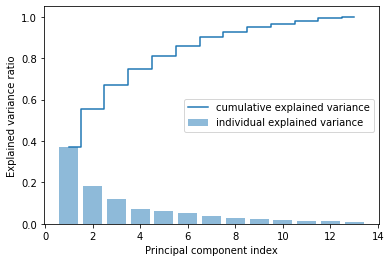

In [58]:
import matplotlib.pyplot as plt

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

The resulting plot indicates that the first principal component alone accounts for approximately 40% of the variance. Also, we can see that the first two principal components combined explain almost 60% of the variance in the dataset.


### Sort

Sort the eigenpairs by decreasing order of the eigenvalues:

In [67]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [70]:
print(f"Higher eigenvalue : {eigen_pairs[0][0]}")
print(f" -> Associated eigenverctor (1x{len(eigen_pairs[0][1])}) : {eigen_pairs[0][1]}")

Higher eigenvalue : 4.842745315655893
 -> Associated eigenverctor (1x13) : [-0.13724218  0.24724326 -0.02545159  0.20694508 -0.15436582 -0.39376952
 -0.41735106  0.30572896 -0.30668347  0.07554066 -0.32613263 -0.36861022
 -0.29669651]


## Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d)

Next, we collect the k eigenvectors that correspond to the k largest eigenvalues. That means the k stronger directions (axes in the space).

In [77]:
print(f"New dimensionality k = {k}")

New dimensionality k = 2


In [87]:
k_eigenvec = [eigen_pairs[i][1][:, np.newaxis] for i in range(k)]

print(f"Number of considered eigen_vecs to the new subspace k= {len(k_eigenvec)}")
print(f"Number of entries by eing_vecs (same as original dimensionality) = {len(k_eigenvec[0])}")

Number of considered eigen_vecs to the new subspace k= 2
Number of entries by eing_vecs (same as original dimensionality) = 13


[array([[-0.13724218],
        [ 0.24724326],
        [-0.02545159],
        [ 0.20694508],
        [-0.15436582],
        [-0.39376952],
        [-0.41735106],
        [ 0.30572896],
        [-0.30668347],
        [ 0.07554066],
        [-0.32613263],
        [-0.36861022],
        [-0.29669651]]), array([[ 0.50303478],
        [ 0.16487119],
        [ 0.24456476],
        [-0.11352904],
        [ 0.28974518],
        [ 0.05080104],
        [-0.02287338],
        [ 0.09048885],
        [ 0.00835233],
        [ 0.54977581],
        [-0.20716433],
        [-0.24902536],
        [ 0.38022942]])]

## Construct a projection matrix W from the “top” k eigenvectors

With the k stronger eigen vectors we generate a projection matrix

In [90]:
w = np.hstack(k_eigenvec)
print(f'Matrix W {w.shape}:\n', w)

Matrix W (13, 2):
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


## Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace

By executing the preceding code, we have created a 13 x k -dimensional projection matrix W from the top k eigenvectors.

Using the projection matrix, we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace (the principal components one and two) obtaining x′, now a two-dimensional sample vector consisting of two new features:

![vector transf](https://miro.medium.com/max/59/1*nuYZrTF8trabAfJq-3wVcA.png)

In [83]:
pos = 0

x = X_train_std[pos]

print(f'Example x from the {pos} entry : {x}')

# Transform the x to the new PCA subspace
x_new = x.dot(w)

print(f"Representation of x in the new {k}-d subspace : {x_new}")

Example x from the 0 entry : [ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
 -0.62946362]
Representation of x in the new 2-d subspace : [2.38299011 0.45458499]


Similarly, we can transform all the original dataset

In [95]:
X_train_pca = X_train_std.dot(w)

print("New representation of the 10 first examples")
X_train_pca[0:10]

New representation of the 10 first examples


array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947]])

## Visualization

If the k selected we can represent it in a 2D plotting

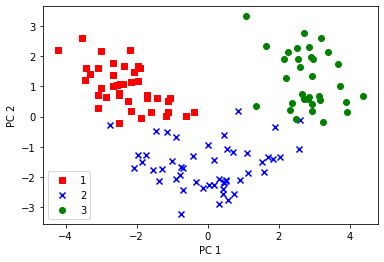

In [96]:
if k == 2:
  colors = ['r', 'b', 'g']
  markers = ['s', 'x', 'o']
  for l, c, m in zip(np.unique(y_train), colors, markers):
      plt.scatter(X_train_pca[y_train==l, 0], 
                  X_train_pca[y_train==l, 1], 
                  c=c, label=l, marker=m) 
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.legend(loc='lower left')
  plt.show()

As we can see in the resulting plot, the data is more spread along the x-axis — the first principal component — than the second principal component (y-axis), which is consistent with the explained variance ratio plot that we created previously. However, we can intuitively see that a linear classifier will likely be able to separate the classes well.